In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn import linear_model , metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'D:\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv')

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

<AxesSubplot:>

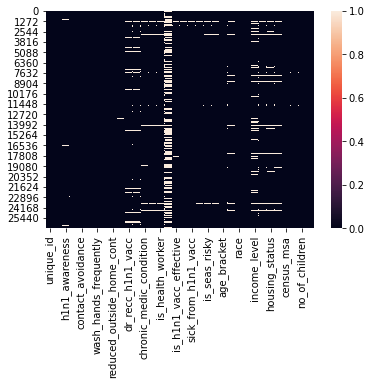

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:>

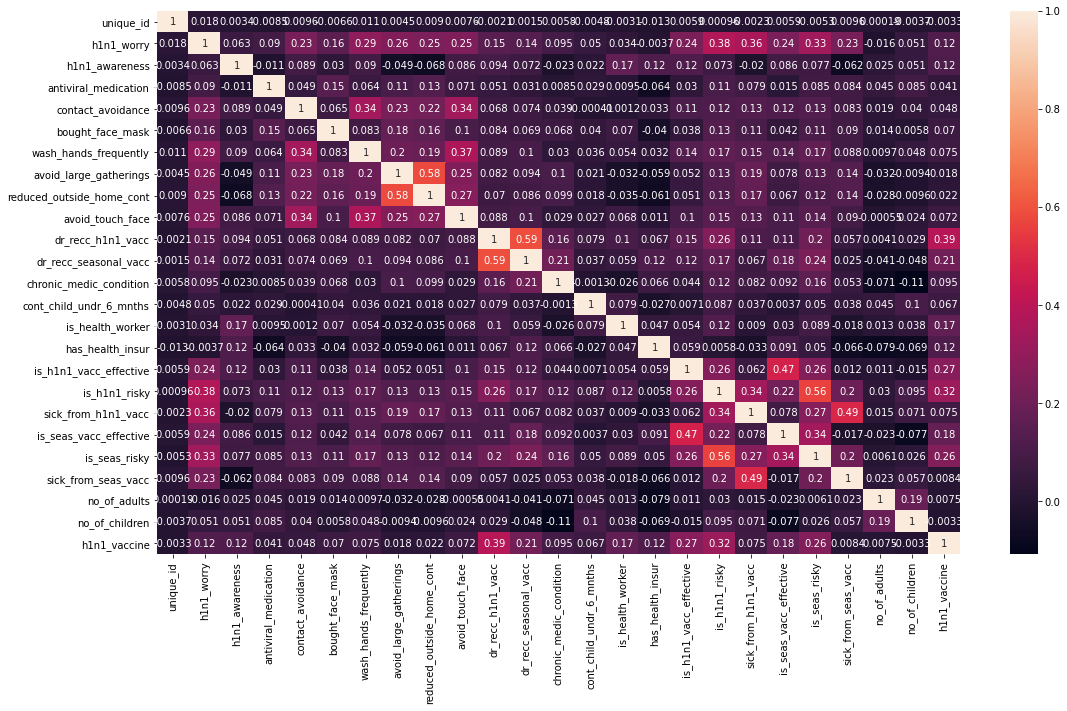

In [7]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

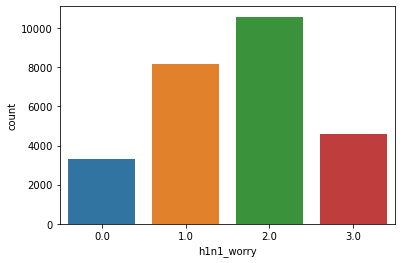

In [8]:
sns.countplot('h1n1_worry',data=df)

In [9]:
df['h1n1_worry']=df['h1n1_worry'].fillna(df['h1n1_worry'].mode())

In [10]:
df[df['h1n1_worry'].isnull()]

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
44,44,NaN,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
96,96,NaN,1.0,0.0,1.0,0.0,1.0,0.0,NaN,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
150,150,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
411,411,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,1
758,758,NaN,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,...,White,Female,NaN,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,25788,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
25883,25883,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
25948,25948,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,Black,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,1
26358,26358,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,Non-MSA,0.0,0.0,0


In [11]:
df.drop(['sick_from_seas_vacc','no_of_adults','no_of_children','unique_id'],axis=1,inplace=True)

In [12]:
df.drop('has_health_insur',axis=1,inplace=True)

In [13]:
df.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,3.850623,2.342566,2.357670,4.025986,2.719162,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,1.007436,1.285539,1.362766,1.086565,1.385055,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [14]:
df['h1n1_worry'].mode()

0    2.0
dtype: float64

In [15]:
df['h1n1_worry']=df['h1n1_worry'].fillna(2)

In [16]:
df['h1n1_awareness'].mode()

0    1.0
dtype: float64

In [17]:
df['h1n1_awareness']=df['h1n1_awareness'].fillna(1)

In [18]:
df['antiviral_medication'].mode()

0    0.0
dtype: float64

In [19]:
df['antiviral_medication']=df['antiviral_medication'].fillna(0) 

In [20]:
df[df['contact_avoidance'].isnull()][['wash_hands_frequently','avoid_touch_face']]

,wash_hands_frequently,avoid_touch_face
42,0.0,0.0
76,0.0,0.0
198,1.0,1.0
280,1.0,1.0
501,1.0,1.0
...,...,...
25987,1.0,1.0
26257,1.0,0.0
26401,1.0,1.0
26613,1.0,0.0


In [21]:
def fn(coln):
    wash=coln[0]
    avoid=coln[1]
    con=coln[2]
    if pd.isnull(con):
        if wash==1 and avoid==1:
            return 1
        else:
            return 0
    else:
        return con
df['contact_avoidance']=df[['wash_hands_frequently','avoid_touch_face','contact_avoidance']].apply(fn,axis=1)

In [22]:
df['bought_face_mask'].mode()

0    0.0
dtype: float64

In [23]:
df['bought_face_mask']=df['bought_face_mask'].fillna(0)

In [24]:
df['wash_hands_frequently'].mode()

0    1.0
dtype: float64

In [25]:
df['wash_hands_frequently']=df['wash_hands_frequently'].fillna(1)

In [26]:
df['avoid_large_gatherings'].mode()

0    0.0
dtype: float64

In [27]:
df['avoid_large_gatherings']=df['avoid_large_gatherings'].fillna(0)

In [28]:
df['reduced_outside_home_cont'].mode()

0    0.0
dtype: float64

In [29]:
df['reduced_outside_home_cont']=df['reduced_outside_home_cont'].fillna(0)

In [30]:
df['avoid_touch_face'].mode()

0    1.0
dtype: float64

In [31]:
df['avoid_touch_face']=df['avoid_touch_face'].fillna(1)

In [32]:
df[(df['dr_recc_seasonal_vacc'].isnull())&(df['dr_recc_h1n1_vacc'].isnull())]

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,h1n1_vaccine
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0
76,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,55 - 64 Years,College Graduate,White,Male,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0
90,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,...,18 - 34 Years,College Graduate,Other or Multiple,Female,NaN,Not Married,Rent,Employed,Non-MSA,0
94,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,NaN,...,35 - 44 Years,NaN,Hispanic,Female,NaN,NaN,NaN,NaN,"MSA, Not Principle City",0
97,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,...,45 - 54 Years,College Graduate,White,Male,"> $75,000",Not Married,Own,Not in Labor Force,"MSA, Principle City",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26675,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,...,45 - 54 Years,NaN,White,Male,NaN,NaN,NaN,NaN,Non-MSA,0
26679,3.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,...,55 - 64 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",0
26682,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,...,45 - 54 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",0
26692,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,18 - 34 Years,< 12 Years,White,Female,Below Poverty,Not Married,Rent,Employed,Non-MSA,0


In [33]:
def fn(coln):
    vac=coln[0]
    ris=coln[1]
    if pd.isnull(vac):
        if ris==4 or ris==5:
            return 1
        else:
            return 0
    else:
        return vac
df['dr_recc_h1n1_vacc']=df[['dr_recc_h1n1_vacc','is_h1n1_risky']].apply(fn,axis=1)

In [34]:
def fn(coln):
    vac=coln[0]
    svac=coln[1]
    if pd.isnull(svac):
        if vac==1:
            return 0
        else:
            return 1
    else:
        return svac
df['dr_recc_seasonal_vacc']=df[['dr_recc_h1n1_vacc','dr_recc_seasonal_vacc']].apply(fn,axis=1)

In [35]:
def fn(coln):
    chro=coln[0]
    svac=coln[1]
    if pd.isnull(chro):
        if svac==1:
            return 1
        else:
            return 0
    else:
        return chro
df['chronic_medic_condition']=df[['chronic_medic_condition','dr_recc_seasonal_vacc']].apply(fn,axis=1)

In [36]:
df['cont_child_undr_6_mnths'].mode()

0    0.0
dtype: float64

In [37]:
df['cont_child_undr_6_mnths']=df['cont_child_undr_6_mnths'].fillna(0)

In [38]:
def fn(coln):
    hea=coln[0]
    awa=coln[1]
    if pd.isnull(hea):
        if awa==1 or awa==2:
            return 1
        else:
            return 0
    else:
        return hea
df['is_health_worker']=df[['is_health_worker','h1n1_awareness']].apply(fn,axis=1)

In [39]:
df['is_h1n1_vacc_effective'].mode()

0    4.0
dtype: float64

In [40]:
df['is_h1n1_vacc_effective']=df['is_h1n1_vacc_effective'].fillna(4)

In [41]:
df['is_h1n1_risky'].mode()

0    2.0
dtype: float64

In [42]:
df['is_h1n1_risky']=df['is_h1n1_risky'].fillna(2)

In [43]:
df['sick_from_h1n1_vacc'].mode()

0    2.0
dtype: float64

In [44]:
df['sick_from_h1n1_vacc']=df['sick_from_h1n1_vacc'].fillna(2)

In [45]:
def fn(coln):
    svac=coln[0]
    vac=coln[1]
    if pd.isnull(svac):
        return vac
    else:
        return svac
df['is_seas_vacc_effective']=df[['is_seas_vacc_effective','is_h1n1_vacc_effective']].apply(fn,axis=1)

In [46]:
def fn(coln):
    sea=coln[0]
    h1n1=coln[1]
    if pd.isnull(sea):
        return h1n1
    else:
        return sea
df['is_seas_risky']=df[['is_seas_risky','is_h1n1_risky']].apply(fn,axis=1)

In [47]:
df['qualification'].mode()

0    College Graduate
dtype: object

<AxesSubplot:xlabel='qualification', ylabel='count'>

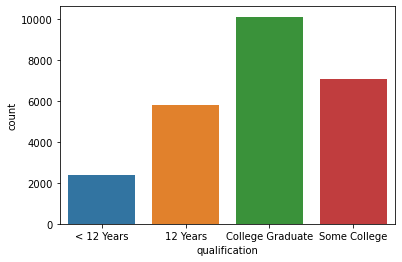

In [48]:
sns.countplot('qualification',data=df)

In [49]:
df['qualification']=df['qualification'].fillna('College Graduate')

In [50]:
df['income_level'].mode()

0    <= $75,000, Above Poverty
dtype: object

In [51]:
df['income_level'].value_counts().to_frame()
# sns.counplot(a1)

,income_level
"<= $75,000, Above Poverty",12777
"> $75,000",6810
Below Poverty,2697


In [52]:
df['income_level']=df['income_level'].fillna('<= $75,000, Above Poverty')

In [53]:
a1=pd.DataFrame(df['marital_status'].value_counts())
a1

,marital_status
Married,13555
Not Married,11744


In [54]:
df['marital_status']=df['marital_status'].fillna('Married')

In [55]:
df['housing_status'].value_counts()

Own     18736
Rent     5929
Name: housing_status, dtype: int64

In [56]:
df['housing_status']=df['housing_status'].fillna('Own')

In [57]:
df['employment'].value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64

In [58]:
df['employment']=df['employment'].fillna('Employed')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [60]:
df['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [61]:
df['sex'].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [62]:
df['census_msa'].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [63]:
X=df.drop('h1n1_vaccine',axis=1)
y=df['h1n1_vaccine']

In [64]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: h1n1_vaccine, dtype: int64

In [65]:
X=pd.get_dummies(X,columns=['sex','race','income_level','marital_status','housing_status','employment','census_msa','qualification'],drop_first=True)

In [66]:
X=pd.get_dummies(X,columns=['age_bracket'],drop_first=True)

In [67]:
X.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,1,0,0


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, df['h1n1_vaccine'], test_size=0.20, random_state=12)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [72]:
pred=lr.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,accuracy_score

In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4240
           1       0.64      0.41      0.50      1102

    accuracy                           0.83      5342
   macro avg       0.75      0.67      0.70      5342
weighted avg       0.81      0.83      0.82      5342



In [75]:
y_train_pred=lr.predict(X_train)

In [76]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     18633
           1       0.39      0.65      0.49      2732

    accuracy                           0.82     21365
   macro avg       0.67      0.75      0.69     21365
weighted avg       0.87      0.82      0.84     21365

